In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
# dataset with the pairwise angles between nearest neighbor rubiscos
df = pd.read_csv('dataForAngleBetweenRubiscosAndItsNeighbors.csv')

In [3]:
df

,reg,numRub,numRubInner,volume,angle,distance,innerConcentration
0,1,184,96,4.532252e-22,22.318077,60.974799,351.727482
1,1,184,96,4.532252e-22,27.746894,66.031500,351.727482
2,1,184,96,4.532252e-22,49.354137,71.033294,351.727482
3,1,184,96,4.532252e-22,30.531573,68.471382,351.727482
4,1,184,96,4.532252e-22,88.239750,73.058717,351.727482
...,...,...,...,...,...,...,...
66500,139,437,320,1.084721e-21,31.941295,66.094584,489.870357
66501,139,437,320,1.084721e-21,32.276556,72.488617,489.870357
66502,139,437,320,1.084721e-21,25.792350,80.810071,489.870357
66503,139,437,320,1.084721e-21,22.702194,75.080956,489.870357


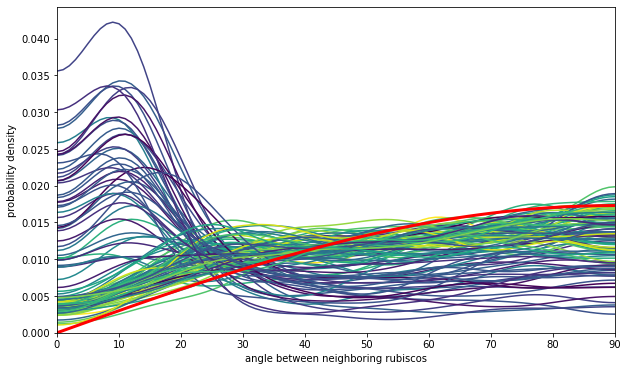

In [4]:
# angle distribution plot

# define the analytical distribution for the angle between two orientations
def norm_sin_deg(domain_deg):
    # get the interval of the input data (assuming it is linearly spaced)
    interval = domain_deg[1]-domain_deg[0]
    # compute the sine (input in degrees)
    sin0 = np.sin(domain_deg*(np.pi/180))
    # return the normalized distribution
    return sin0 / (interval*sin0.sum())
    

# set angle domain to plot over and get interval
ang_domain = np.linspace(0,90,91)
ang_int = ang_domain[1] - ang_domain[0]


# calculate minimum and maximum rubisco inner concentrations
cmax = df['innerConcentration'].max()
cmin = df['innerConcentration'].min()

# get unique carboxysome ids
cbids = df['reg'].unique()

# intialize figure
fig = plt.figure(figsize=(10,6))

# iterate over carboxysome (doing so id order purely for aesthetics of overlapping curves)
for ind, cbid in enumerate(np.flip(cbids)):
    # get innerconcentration of rubisco
    innerconc = np.mean(df.loc[df['reg']==cbid]['innerConcentration'])
    # extract angles between rubisco nearest neighbors
    diffangles0 = df.loc[df['reg']==cbid]['angle'].to_numpy()
    # polar angle data is over domain [0, 90] but is inherently periodic with period 180 and reflection about 0 and 90
    # to avoid artifacts of kernel density estimator at margins the data were extended using this symmetry
    diffangles = np.concatenate((diffangles0, -diffangles0, 180 - diffangles0))
    # calculate gaussian kernel density estimate for data, bandwidth parameter manually set for clarity of presentation
    kde = gaussian_kde(diffangles, 0.08)
    # compute density over domain
    dens0 = kde(ang_domain)
    # normalize density
    dens = dens0 / dens0.sum()
    # generate colormap color value according to concentration
    colorvalue = plt.cm.viridis_r(int(255*(innerconc - cmin)/(cmax-cmin)))
    # plot the density for each carboxysome
    plt.plot(ang_domain, dens, color=colorvalue)

# plot analytical distribution for random rubisco orientations
plt.plot(ang_domain, norm_sin_deg(ang_domain), color='red', linewidth=3)
plt.xlabel("angle between neighboring rubiscos")
plt.ylabel("probability density")
plt.xlim([0,90])
plt.ylim(bottom=0)
plt.show()
fig.savefig("neighbor_dist1.eps", format="eps")